In [1]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00


In [1]:
!pip uninstall -y numpy
!pip install numpy==1.24.3
!pip install gensim --force-reinstall

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninst

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3.1 Text Preprocessing, Tokenization, and Sequence Padding:

In [46]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
# --- 2. Download necessary NLTK resources ---
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
data = pd.read_csv('/content/drive/MyDrive/4. Hate Speech Detection Dataset/hatevsoffensive_language.csv')

In [6]:
# Fix typos in the label column
data['label'] = data['label'].replace({'hate speec': 'hate speech'})

#Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def clean_text(text):

    inp_text = text.lower()
    inp_text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    inp_text = re.sub(r"@\w+|#\w+", '', text)                # Remove mentions and hashtags
    inp_text = re.sub(r"[^A-Za-z\s]", '', text)              # Remove special characters & numbers

    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [10]:
# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

# Label Mapping (0,1,2)
label_mapping = {'hate speech': 0, 'offensive language': 1, 'neither': 2}
data['label_num'] = data['label'].map(label_mapping)

# check for any unmapped labels
if data['label_num'].isnull().any():
    print("Warning: Some labels were not mapped.")

print(data['label'].value_counts())

label
offensive language    19190
neither                4163
hate speech            1430
Name: count, dtype: int64


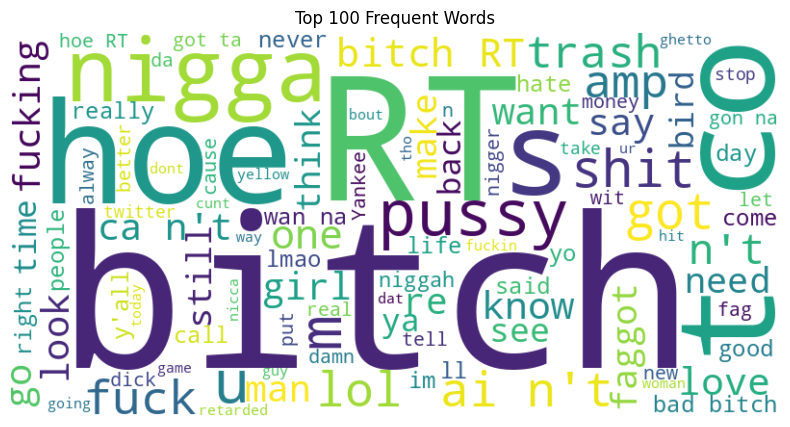

In [11]:
#Word Cloud Visualization
# Check for nulls before joining text
if data['cleaned_text'].isnull().any():
    print("Warning: 'cleaned_text' contains null values.")
    data['cleaned_text'] = data['cleaned_text'].fillna('')

#combine all text into 1 string
all_w = ' '.join(data['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_w)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Frequent Words')
plt.show()

In [13]:
# Check for NaN values in the 'label_num' column
print(data['label_num'].isna().sum())
# Drop rows with 'label_num' is NaN
data = data.dropna(subset=['label_num'])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],
    data['label_num'],
    test_size=0.2,
    random_state=42,
    stratify=data['label_num']
)


# Confirm split sizes
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


0
Train size: 19826
Test size: 4957


In [14]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [19]:
# Padding
# 95th percentile for train and then drop
train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95)) #avoid large data to avoid ouliers, noise

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

#Print vocabulary size (actual, may be less than 10,000)
print("Vocabulary size:", len(tokenizer.word_index))


#Print shapes
print("X_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape:", X_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Max sequence length (95th percentile):", max_len)

Vocabulary size: 30108
X_train_pad shape: (19826, 21)
X_test_pad shape: (4957, 21)
y_train shape: (19826,)
y_test shape: (4957,)
Max sequence length (95th percentile): 21


#3.2 Model Building and Training:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
# Common hyperparameters
vocab_size = 10000
embedding_dim = 128
num_classes = 3  # hate speech, offensive, neither

# Early stopping and checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [48]:
# Build first model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 1
h_rnn = rnn_model.fit(
    X_train_pad, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


496/496 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8256 - loss: 0.5109 - val_accuracy: 0.9014 - val_loss: 0.3074
Epoch 2/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9249 - loss: 0.2412 - val_accuracy: 0.8883 - val_loss: 0.3262
Epoch 3/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9609 - loss: 0.1268 - val_accuracy: 0.8591 - val_loss: 0.4132
Epoch 4/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9817 - loss: 0.0605 - val_accuracy: 0.8633 - val_loss: 0.5000
Epoch 5/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.8689 - val_loss: 0.5102
Epoch 6/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9903 - loss: 0.0306 - val_accuracy: 0.8661 - val_loss: 0.5823
Epoch 7/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.8691 - val_loss: 0.5774
Epoch 8/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9938 - loss: 0.0162 - val_

In [49]:
# Build second model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train second model
h_lstm = lstm_model.fit(
    X_train_pad, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.8105 - loss: 0.5516 - val_accuracy: 0.9009 - val_loss: 0.2966
Epoch 2/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9157 - loss: 0.2543 - val_accuracy: 0.9044 - val_loss: 0.2843
Epoch 3/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9417 - loss: 0.1732 - val_accuracy: 0.8969 - val_loss: 0.3082
Epoch 4/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9607 - loss: 0.1223 - val_accuracy: 0.8933 - val_loss: 0.3359
Epoch 5/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9725 - loss: 0.0875 - val_accuracy: 0.8817 - val_loss: 0.3805
Epoch 6/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9808 - loss: 0.0631 - val_accuracy: 0.8744 - val_loss: 0.4393
Epoch 7/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9856 - loss: 0.0507 - val_accuracy: 0.8825 - val_loss: 0.4617
Epoch 8/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9871 - loss: 0

#3.3 Model Training and Evaluation

In [37]:
import gensim.downloader
import gensim.downloader as api
from gensim.models import KeyedVectors

model = api.load("glove-wiki-gigaword-50")

#glove root
file_path = '/root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz'
word2vec_model = KeyedVectors.load_word2vec_format(file_path, binary=False)
word2vec_model.save_word2vec_format("glove-wiki-gigaword-50.bin", binary=True)

# models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [50]:
# Load GloVe embeddings (50D)
word2vec = api.load("glove-wiki-gigaword-50")

# Create embedding matrix
embedding_dim_word2vec = 50
embedding_matrix = np.zeros((vocab_size, embedding_dim_word2vec))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in word2vec:
            embedding_matrix[i] = word2vec[word]


In [51]:
# Build Model 3
lstm_w2v_model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim_word2vec,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_w2v_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model 3
h_lstm_w2v = lstm_w2v_model.fit(
    X_train_pad, y_train,
    epochs=250,

    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7866 - loss: 0.6091 - val_accuracy: 0.8396 - val_loss: 0.4292
Epoch 2/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8467 - loss: 0.3921 - val_accuracy: 0.8641 - val_loss: 0.3455
Epoch 3/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8658 - loss: 0.3495 - val_accuracy: 0.8704 - val_loss: 0.3274
Epoch 4/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8760 - loss: 0.3207 - val_accuracy: 0.8797 - val_loss: 0.3166
Epoch 5/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8765 - loss: 0.3178 - val_accuracy: 0.8820 - val_loss: 0.3155
Epoch 6/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8885 - loss: 0.3019 - val_accuracy: 0.8817 - val_loss: 0.3146
Epoch 7/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8917 - loss: 0.2937 - val_accuracy: 0.8863 - val_loss: 0.2962
Epoch 8/250
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9001 - loss: 0.2739

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Simple RNN Accuracy: 0.8923


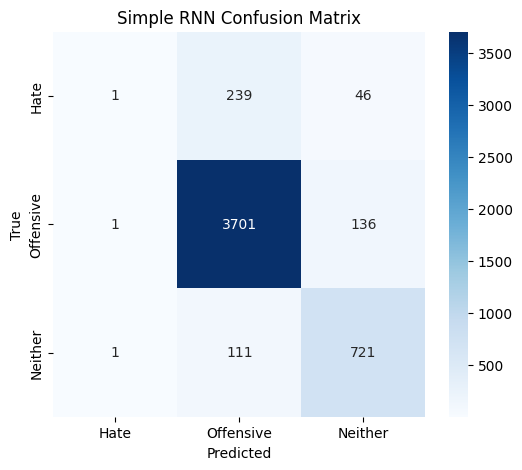

Simple RNN Classification Report:
              precision    recall  f1-score   support

        Hate       0.33      0.00      0.01       286
   Offensive       0.91      0.96      0.94      3838
     Neither       0.80      0.87      0.83       833

    accuracy                           0.89      4957
   macro avg       0.68      0.61      0.59      4957
weighted avg       0.86      0.89      0.87      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
LSTM Accuracy: 0.9003


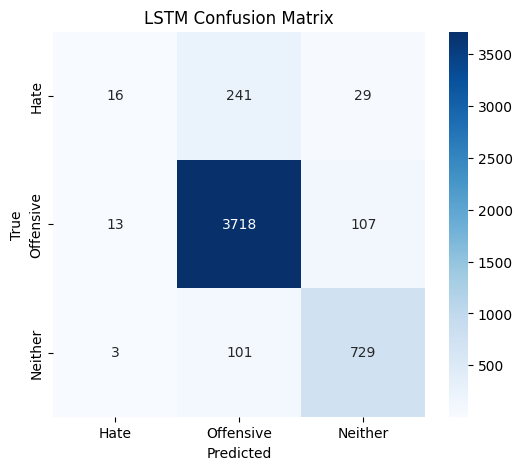

LSTM Classification Report:
              precision    recall  f1-score   support

        Hate       0.50      0.06      0.10       286
   Offensive       0.92      0.97      0.94      3838
     Neither       0.84      0.88      0.86       833

    accuracy                           0.90      4957
   macro avg       0.75      0.63      0.63      4957
weighted avg       0.88      0.90      0.88      4957

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM + Word2Vec Accuracy: 0.8733


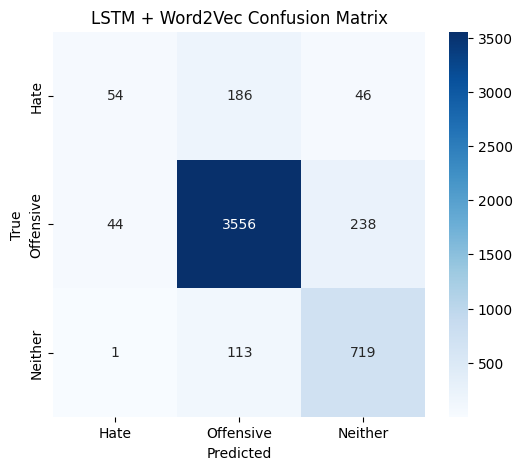

LSTM + Word2Vec Classification Report:
              precision    recall  f1-score   support

        Hate       0.55      0.19      0.28       286
   Offensive       0.92      0.93      0.92      3838
     Neither       0.72      0.86      0.78       833

    accuracy                           0.87      4957
   macro avg       0.73      0.66      0.66      4957
weighted avg       0.87      0.87      0.86      4957



In [53]:


# --- Function to evaluate any model ---
def evaluate_model(model, X_test_pad, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test_pad)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # True labels
    y_true = y_test

    # Accuracy
    acc = accuracy_score(y_true, y_pred_classes)
    print(f"{model_name} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate', 'Offensive', 'Neither'], yticklabels=['Hate', 'Offensive', 'Neither'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred_classes, labels=[0, 1, 2], target_names=['Hate', 'Offensive', 'Neither']))

# --- Evaluate all 3 models ---
evaluate_model(rnn_model, X_test_pad, y_test, "Simple RNN")
evaluate_model(lstm_model, X_test_pad, y_test, "LSTM")
evaluate_model(lstm_w2v_model, X_test_pad, y_test, "LSTM + Word2Vec")


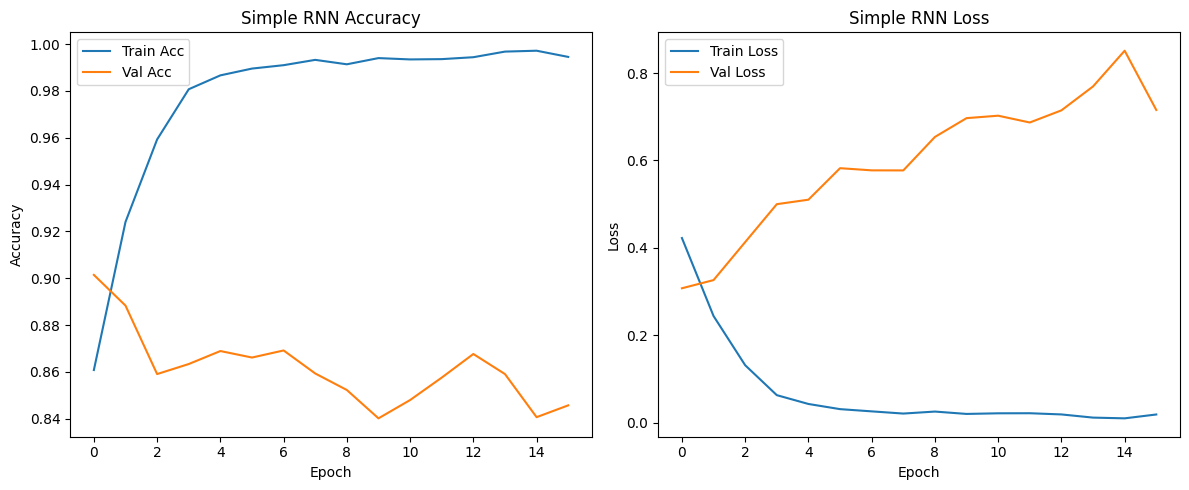

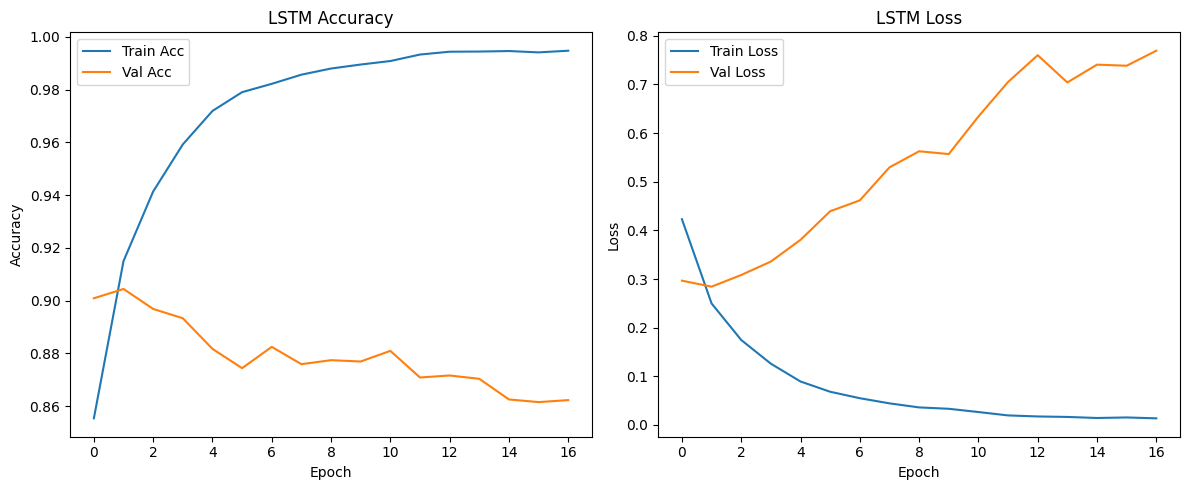

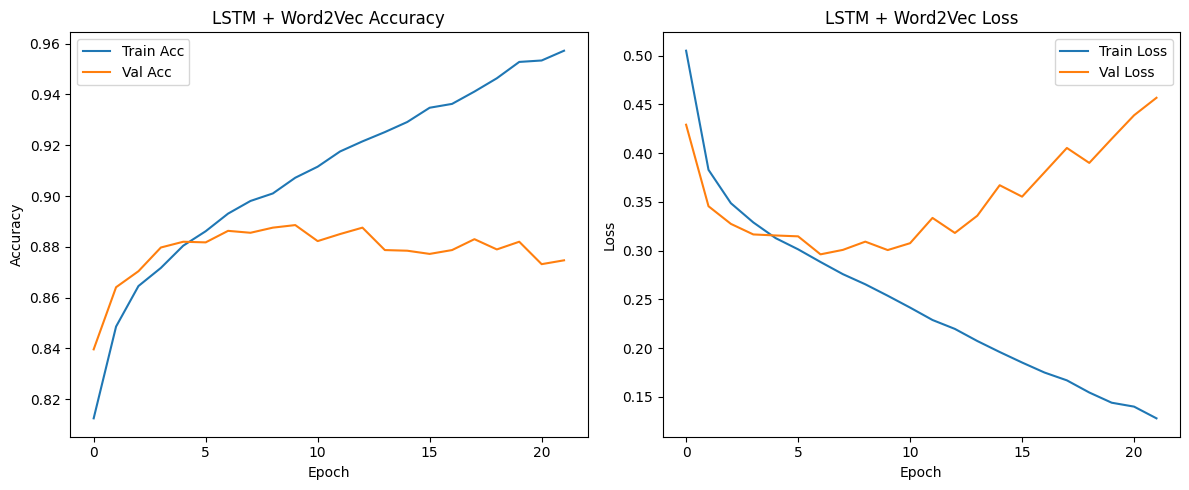

In [54]:
# --- Function to plot training history ---
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Plot for each model ---
plot_training_history(h_rnn, "Simple RNN")
plot_training_history(h_lstm, "LSTM")
plot_training_history(h_lstm_w2v, "LSTM + Word2Vec")


#3.4 GUI for Real Time Prediction:

In [55]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
import re

# Load trained model
# Load the best model you trained
best_model = load_model('best_model.h5')

#Load tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
# Fit on your training data
tokenizer.fit_on_texts(data['cleaned_text'])

#Text cleaning function
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()

def clean_text(text):
    g_text = text.lower()
    g_text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    g_text = re.sub(r"@\w+|#\w+", '', text)                # Remove mentions and hashtags
    g_text = re.sub(r"[^A-Za-z\s]", '', text)              # Remove special characters & numbers
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [56]:
# --- Prediction function ---
def predict_hate_speech(text):
    cleaned_text = clean_text(text)
    text_seq = tokenizer.texts_to_sequences([cleaned_text])
    max_len = 56  # This is the 95th percentile length you used in your model
    text_pad = pad_sequences(text_seq, maxlen=max_len, padding='post', truncating='post')

    prediction = best_model.predict(text_pad)
    label_map = {0: "Hate Speech", 1: "Offensive Language", 2: "Neither"}

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]
    return label_map[predicted_class]

In [57]:
import gradio as gr
# --- Gradio interface ---
iface = gr.Interface(
    fn=predict_hate_speech,  # The function that makes predictions
    inputs=gr.Textbox(label="Enter Tweet"),  # Input type (textbox for text input)
    outputs=gr.Textbox(label="Prediction"),  # Output type (textbox for result)
    live=True,  # This will give real-time predictions as you type
    title="Hate Speech Detection",  # Title for the interface
    description="Enter a tweet to classify it as 'Hate Speech', 'Offensive Language', or 'Neither'."
)

# Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5fda813a13cdc26724.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
